<a href="https://colab.research.google.com/github/yunus-cpu/CNN_braintumor/blob/main/cnn_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Drive'a bağlanma
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd


'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOV8/8_CNN_tumor

/content/drive/MyDrive/YOLOV8/8_CNN_tumor


In [ ]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
import os
import cv2
import numpy as np

# Boş listeler oluştur
X_train = []
Y_train = []

# Görsel boyutu
image_size = 150

# Etiket klasör isimleri
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# 🔁 Eğitim Görsellerini Yükle
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/YOLOV8/8_CNN_tumor/data/BrainTumor_classification/train', label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)
        except:
            print(f"Hata oluştu: {img_path}")
            continue

# 🔁 Test Görsellerini Yükle
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/YOLOV8/8_CNN_tumor/data/BrainTumor_classification/test', label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)
        except:
            print(f"Hata oluştu: {img_path}")
            continue

# Listeyi numpy dizisine çevir
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential([
    Input(shape=(150, 150, 3)),  # Giriş katmanı input_shape ile tanımlandı
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout oranı biraz düşürüldü

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),  # Yoğun katman sayısı ve nöron sayısı azaltıldı
    Dropout(0.5),  # Yoğun katmanda daha yüksek dropout
    Dense(4, activation='softmax')
])

In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,688,772 (29.33 MB)

 Trainable params: 7,688,772 (29.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Training
history = model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.4424 - loss: 10.0201 - val_accuracy: 0.7399 - val_loss: 0.7057
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.7037 - loss: 0.7498 - val_accuracy: 0.7926 - val_loss: 0.5925
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8137 - loss: 0.5196 - val_accuracy: 0.8524 - val_loss: 0.4040
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.8711 - loss: 0.3670 - val_accuracy: 0.8822 - val_loss: 0.3721
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8858 - loss: 0.3186 - val_accuracy: 0.8858 - val_loss: 0.3651
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9050 - loss: 0.2735 - val_accuracy: 0.9016 - val_loss: 0.2835
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9183 - loss: 0.2188 - val_accuracy: 0.9139 - val_loss: 0.2872
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9237 - loss: 0.2055 -

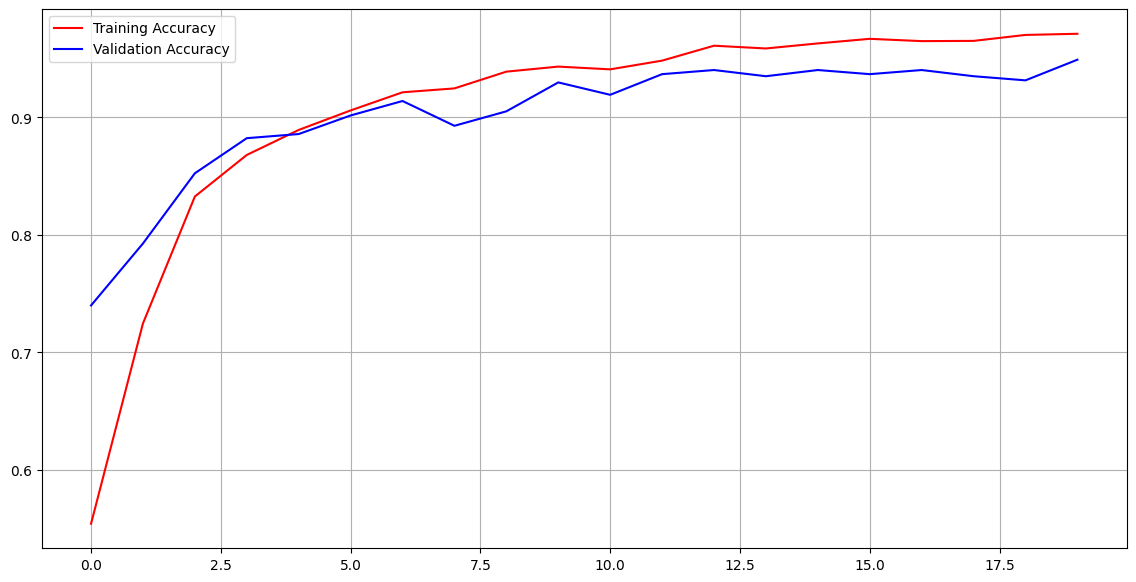

In [ ]:
import matplotlib.pyplot as plt

model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)

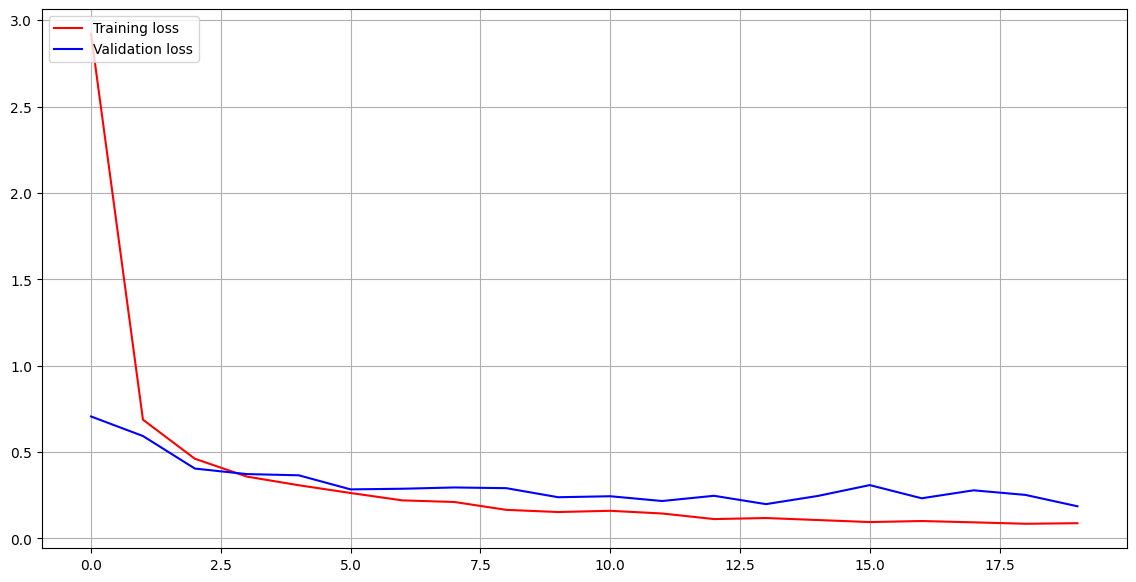

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


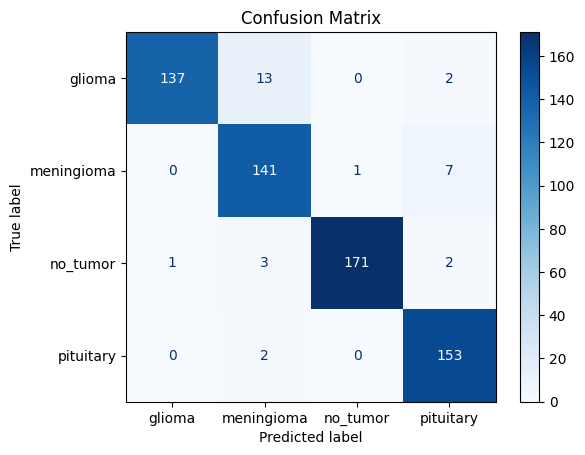

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)  # çünkü bu olasılıklı çıktı
y_true_classes = y_true  # çünkü bu zaten doğrudan sınıf indeksleri


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Sınıf isimlerin
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Tahmin edilen sınıflar
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_true  # Eğer zaten label index şeklindeyse

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Her sınıf için metrikleri hesapla
TP = np.diag(cm)  # True Positive'ler
FP = np.sum(cm, axis=0) - TP  # False Positive'ler
FN = np.sum(cm, axis=1) - TP  # False Negative'ler
TN = np.sum(cm) - (TP + FP + FN)  # True Negative'ler

# Hesaplamalar
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Tabloyu oluştur
metrics_df = pd.DataFrame({
    'Class': labels,
    'Özgünlük (Specificity)': np.round(specificity, 3),
    'Duyarlılık (Recall)': np.round(sensitivity, 3),
    'Kesinlik (Precision)': np.round(precision, 3),
    'F1 Skoru': np.round(f1_score, 3)
})

# Genel doğruluk
accuracy = np.trace(cm) / np.sum(cm)

print(metrics_df)
print(f"\nGenel Doğruluk: %{accuracy * 100:.2f}")


        Class  Özgünlük (Specificity)  Duyarlılık (Recall)  \
0      glioma                   0.998                0.901   
1  meningioma                   0.963                0.946   
2     notumor                   0.998                0.966   
3   pituitary                   0.977                0.987   

   Kesinlik (Precision)  F1 Skoru  
0                 0.993     0.945  
1                 0.887     0.916  
2                 0.994     0.980  
3                 0.933     0.959  

Genel Doğruluk: %95.10


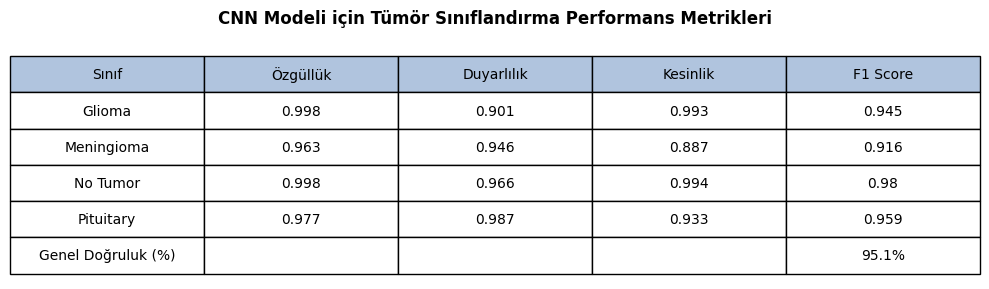

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# CNN veri tablosu
data = {
    "Sınıf": ["Glioma", "Meningioma", "No Tumor", "Pituitary", "Genel Doğruluk (%)"],
    "Özgüllük": [0.998, 0.963, 0.998, 0.977, ""],
    "Duyarlılık": [0.901, 0.946, 0.966, 0.987, ""],
    "Kesinlik": [0.993, 0.887, 0.994, 0.933, ""],
    "F1 Score": [0.945, 0.916, 0.980, 0.959, ""],
}

df = pd.DataFrame(data)
df.loc[4, "F1 Score"] = "95.1%"

# Görsel oluşturma
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colColours=["#B0C4DE"] * len(df.columns)
)

# Stil ayarları
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)

# Başlık
plt.title("CNN Modeli için Tümör Sınıflandırma Performans Metrikleri", fontsize=12, weight='bold', pad=20)

plt.tight_layout()
plt.show()
